In [1]:
from fnal import Dataset
from infn import INFNDataset

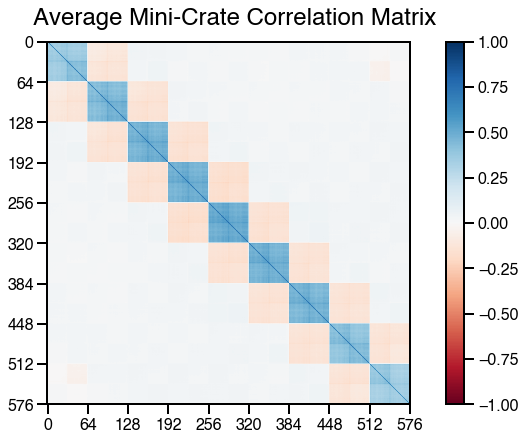

In [2]:
input_path = '/Volumes/MUSB/data'
data = Dataset(input_path, 9762)
data.plot_correlation_matrix('all')

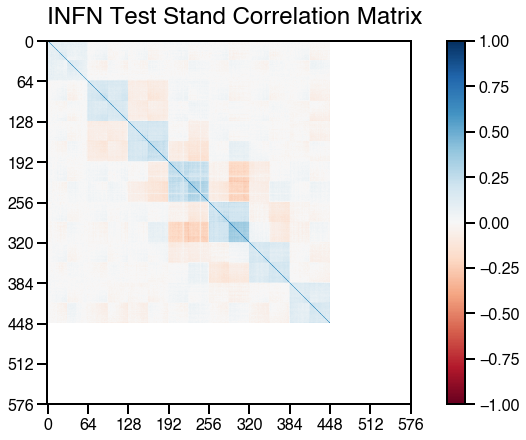

In [3]:
test = INFNDataset('/Volumes/MUSB/infn_data/RUN_100264', 5)
test.plot_correlation_matrix()